In [250]:
from __future__ import print_function

import numpy as np
import scipy
import matplotlib.pyplot as plt

import sklearn.cluster

import librosa
import librosa.display

import IPython.display as ipd
import json
from scipy.signal import find_peaks
from scipy import interpolate
import pandas as pd

In [268]:
def calculate_beat_positions(y, sr, distance):
    
    pulse = librosa.beat.plp(y=y, sr=sr)
    times = librosa.times_like(pulse, sr=sr)
    
    peaks, _ = find_peaks(pulse, distance=distance)
    beat_times = times[peaks]
    
    return beat_times

In [314]:
def calculate_beat_positions2(y, sr):
    
    pulse = librosa.beat.plp(y=y, sr=sr)
    times = librosa.times_like(pulse, sr=sr)
    
    beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
    beat_times = times[beats_plp]
    
    return beat_times

In [253]:
y, sr = librosa.load('data/aaj/song.ogg')

In [298]:
res = calculate_beat_positions(y, sr, 1)
res.shape

(925,)

In [270]:
res.shape

(874,)

In [271]:
df = pd.read_csv('data_info2.csv')

In [275]:
easy = df[~df['Easy'].isnull()].sample(10)

In [306]:
easy_d = {}

for i, el in easy.iterrows():
    song_path = 'data/' + el['song_id'] + '/' + el['song_file']
    y, sr = librosa.load(song_path)
    
    level_path = 'data/' + el['song_id'] + '/' + el['Easy']
    with open(level_path, 'r') as f:
        data = json.load(f)
        t = np.array(sorted(list(set([el['_time'] for el in data['_notes']]))))
        
    easy_d[el['song_id']] = [t.shape[0], y, sr]

In [315]:
res = []

for el in easy_d:
    t = easy_d[el]
    beat1 = len(calculate_beat_positions(y=t[1], sr=t[2], distance=1))
    beat2 = len(calculate_beat_positions2(y=t[1], sr=t[2]))
    res.append((t[0], beat1, beat2))

In [316]:
res

[(741, 925, 925),
 (1216, 1194, 1194),
 (417, 580, 580),
 (569, 628, 628),
 (980, 606, 607),
 (858, 655, 655),
 (1198, 944, 944),
 (466, 362, 362),
 (1209, 1079, 1080),
 (1078, 678, 678)]

In [278]:
easy_d

{'deusex': [741,
  array([ 0.        ,  0.        ,  0.        , ..., -0.00036603,
         -0.00035797, -0.00035679], dtype=float32)]}

In [290]:
len(calculate_beat_positions(easy_d['deusex'][1], sr, 10.2))

687

In [220]:
y, sr = librosa.load('data/aaj/song.ogg')

In [37]:
with open('data/aaj/Easy.dat', 'r') as f:
    data = json.load(f)
    t = np.array(sorted(list(set([el['_time'] for el in data['_notes']]))))
    # tempo = 180
    # mask = librosa.time_to_frames(t / tempo * 60, hop_length=512)
    # res = np.zeros(log_S.shape[1])
    # res[mask] = 1

In [39]:
t.shape[0]

1278

In [44]:
pulse.shape

(1000,)

In [42]:
t / 180 * 60

array([ 11.66666667,  11.83333333,  11.91666667, ..., 291.66666667,
       291.83333333, 292.        ])

In [264]:
peaks.shape

(874,)

In [263]:
beats_plp.shape

(909,)

In [302]:
n = 1000
pulse = librosa.beat.plp(y=y, sr=sr)[:n]
times = librosa.times_like(pulse, sr=sr)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
beat_times = times[beats_plp]

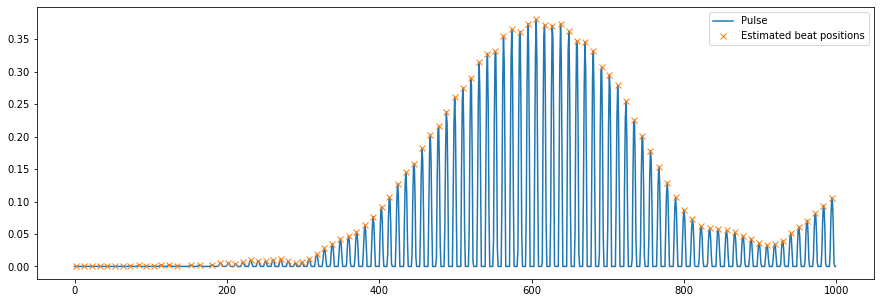

In [303]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(pulse)), pulse, label='Pulse')
plt.plot(beats_plp, pulse[beats_plp], "x", label='Estimated beat positions')
plt.legend()

In [230]:
beats_plp.shape

(73,)

94


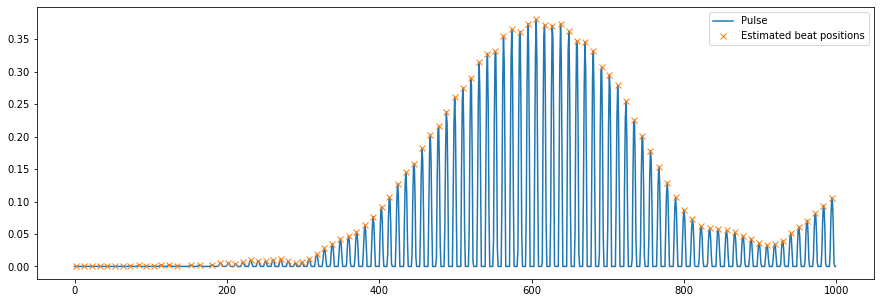

In [305]:
plt.figure(figsize=(15, 5))
peaks, _ = find_peaks(pulse, distance=1)
print(len(peaks))
plt.plot(pulse, label='Pulse')
plt.plot(peaks, pulse[peaks], "x", label='Estimated beat positions')
plt.legend()

35


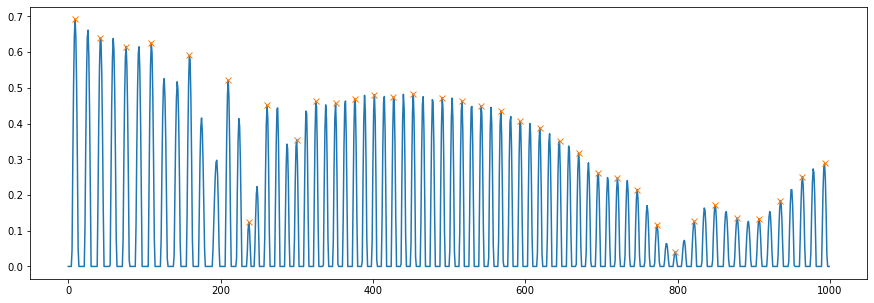

In [231]:
plt.figure(figsize=(15, 5))
peaks, _ = find_peaks(pulse, distance=20)
print(len(peaks))
plt.plot(pulse)
plt.plot(peaks, pulse[peaks], "x")

In [232]:
pulse.shape

(1000,)

In [233]:
times.max()

23.196734693877552

In [234]:
t = t / 180 * 60
t.max()

97.33333333333773

In [235]:
pulse = librosa.beat.plp(y=y, sr=sr)[:4000]
times = librosa.times_like(pulse, sr=sr)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
beat_times = times[beats_plp]

In [236]:
t_frames = librosa.time_to_frames(t, sr=sr)
t_frames = t_frames[t_frames < 4000]

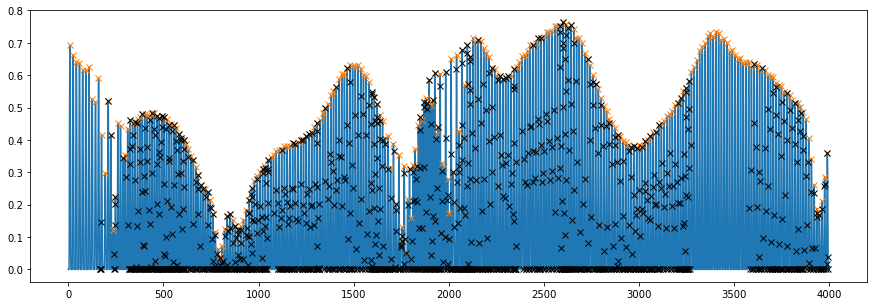

In [237]:
plt.figure(figsize=(15, 5))
plt.plot(pulse)
plt.plot(beats_plp, pulse[beats_plp], "x")
plt.plot(t_frames, pulse[t_frames], 'kx')

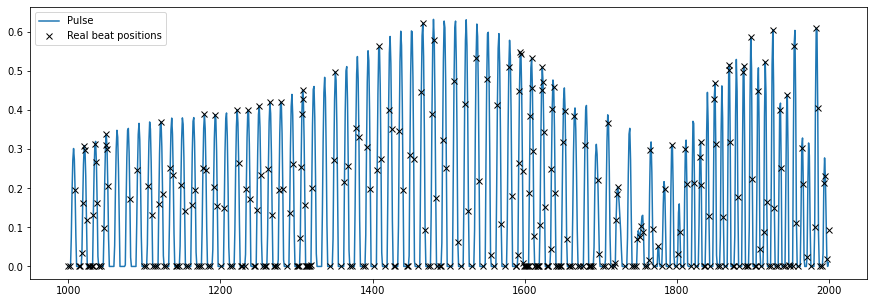

In [240]:
plt.figure(figsize=(15, 5))
t_frames2 = t_frames[np.logical_and(t_frames >= 1000, t_frames <= 2000)]
plt.plot(range(1000, 2000), pulse[1000:2000], label='Pulse')
# plt.plot(beats_plp, pulse[beats_plp], "x")
plt.plot(t_frames2, pulse[t_frames2], 'kx', label='Real beat positions')
plt.legend()

In [201]:
t_frames

array([ 502,  509,  513,  516,  631,  674,  717,  724,  732,  739,  742,
        746,  861,  904,  947,  954,  961,  968,  972,  976,  983,  990,
        997, 1004, 1012, 1019, 1026, 1033, 1040, 1047, 1055, 1062, 1069,
       1076, 1083, 1091, 1098, 1105, 1112, 1119, 1126, 1134, 1141, 1148,
       1155, 1162, 1169, 1177, 1184, 1191, 1195, 1198, 1202, 1205, 1213,
       1220, 1227, 1234, 1241, 1248, 1256, 1263, 1270, 1277, 1284, 1291,
       1299, 1306, 1313, 1320, 1327, 1335, 1342, 1349, 1356, 1363, 1370,
       1378, 1385, 1392, 1399, 1406, 1410, 1414, 1417, 1421, 1424, 1428,
       1431, 1435, 1442, 1446, 1449, 1457, 1464, 1471, 1475, 1478, 1485,
       1492, 1500, 1503, 1507, 1514, 1521, 1528, 1532, 1536, 1543, 1550,
       1557, 1561, 1564, 1571, 1579, 1586, 1589, 1593, 1600, 1607, 1614,
       1618, 1622, 1629, 1636, 1643, 1647, 1650, 1658, 1665, 1672, 1679,
       1686, 1693, 1701, 1708, 1715, 1722, 1729, 1737, 1744, 1751, 1758,
       1765, 1772, 1780, 1783, 1787, 1790, 1794, 17

In [158]:
y = pulse[t_frames]
x = t_frames[y != 0]
y = y[y != 0]

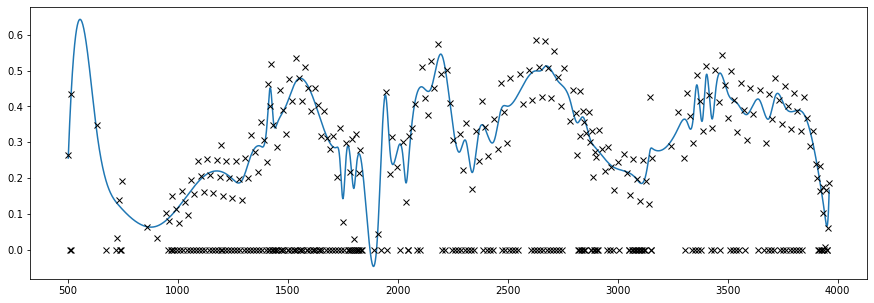

In [196]:
plt.figure(figsize=(15, 5))
# plt.plot(x, y, 'kx')
x_new = np.linspace(x.min(), x.max(), 10000)
spl = interpolate.UnivariateSpline(x, y, k=3)
spl.set_smoothing_factor(0.6)
y_new = spl(x_new)
plt.plot(x_new, y_new)
plt.plot(t_frames, pulse[t_frames], 'kx')

In [191]:
x2 = beats_plp[beats_plp > 500]
y2 = pulse[x2]

spl2 = interpolate.UnivariateSpline(x2, y2, k=3)
spl2.set_smoothing_factor(0.6)
y_new2 = spl2(x_new)

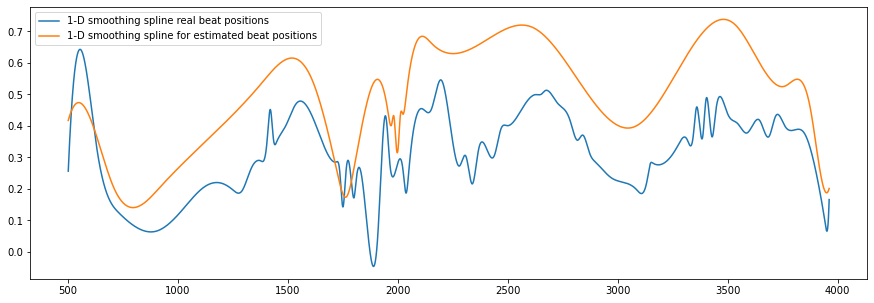

In [215]:
plt.figure(figsize=(15, 5))
plt.plot(x_new, y_new, label='1-D smoothing spline real beat positions')
plt.plot(x_new, y_new2, label='1-D smoothing spline for estimated beat positions')
plt.legend()

In [194]:
np.corrcoef(y_new, y_new2)

array([[1.       , 0.7466344],
       [0.7466344, 1.       ]])

In [63]:
beat_times.shape

(909,)

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(times)
plt.plot(beats_plp, pulse[beats_plp], "x")